In [46]:
%load_ext autoreload
%autoreload 2
from LHCB_Velo_Toy_Models.state_event_generator import *
from LHCB_Velo_Toy_Models import state_event_model 

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dz = 20 #mm

n_particles=[10]
events = len(n_particles)
layers = 5

n = np.sum(n_particles)

module_id = [l for l in range(1, layers+1)]
lx = [33 for x in range(1, layers+1)]
ly = [33 for x in range(1, layers+1)]
zs = [dz*l for l in range(1, layers+1)]

Detector = state_event_model.PlaneGeometry(module_id=[1,2,3],lx = [100,100,100],ly = [100,100,100],z = [10,20,30])
# Detector = state_event_model.RectangularVoidGeometry(module_id=module_id,lx = lx,ly = ly,z=zs, void_x_boundary=5, void_y_boundary=5)

state_event_gen = StateEventGenerator(Detector, events = len(n_particles), n_particles=n_particles,
                                       measurement_error=0.5, collision_noise=0.5)
state_event_gen.generate_random_primary_vertices(events, {'x': 0, 'y': 0, 'z': 0})

[(0, 0, 0.0)]

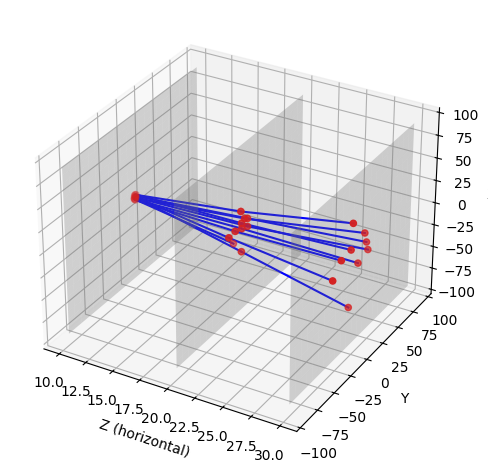

In [107]:
event_particles = []
for event in range(events):
    particles_list = []
    for particle in range(n):
        particle_dict = {
            'type' : 'MIP',
            'mass': 0.511,
            'q': 1
        }
        particles_list.append(particle_dict)
    event_particles.append(particles_list)

state_event_gen.generate_particles(event_particles)

event_tracks = state_event_gen.generate_complete_events()

event_tracks.plot_segments()

In [67]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import SimpleHamiltonian


ham = SimpleHamiltonian(
        epsilon=1e-3,
        gamma=2.0,
        delta=1.0
    )

ham.construct_hamiltonian(event=event_tracks)
print(ham.A.todense())
classical_solution = ham.solve_classicaly()
T = .45
discretized_classical_solution = (classical_solution > T).astype(int)
classical_solution

[[3. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 3.]]


array([0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.5       , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.5       , 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.5       , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

In [50]:
event_tracks.hits

[Hit(hit_id=0, x=np.float64(-0.16247021405418896), y=np.float64(1.890017755771477), z=10, module_id=1, track_id=0),
 Hit(hit_id=1, x=np.float64(-0.3252779971762798), y=np.float64(3.7806829519654013), z=20, module_id=2, track_id=0),
 Hit(hit_id=2, x=np.float64(-0.4892447752873607), y=np.float64(5.671394250940478), z=30, module_id=3, track_id=0),
 Hit(hit_id=3, x=np.float64(2.9234535501066623), y=np.float64(-1.9482243620826707), z=10, module_id=1, track_id=1),
 Hit(hit_id=4, x=np.float64(5.84672154163286), y=np.float64(-3.8960924659298635), z=20, module_id=2, track_id=1),
 Hit(hit_id=5, x=np.float64(8.771034764226165), y=np.float64(-5.844082659914985), z=30, module_id=3, track_id=1)]

In [51]:
print(event_tracks.hits)
print(event_tracks.segments)
print(event_tracks.tracks)
print(event_tracks.modules)

[Hit(hit_id=0, x=np.float64(-0.16247021405418896), y=np.float64(1.890017755771477), z=10, module_id=1, track_id=0), Hit(hit_id=1, x=np.float64(-0.3252779971762798), y=np.float64(3.7806829519654013), z=20, module_id=2, track_id=0), Hit(hit_id=2, x=np.float64(-0.4892447752873607), y=np.float64(5.671394250940478), z=30, module_id=3, track_id=0), Hit(hit_id=3, x=np.float64(2.9234535501066623), y=np.float64(-1.9482243620826707), z=10, module_id=1, track_id=1), Hit(hit_id=4, x=np.float64(5.84672154163286), y=np.float64(-3.8960924659298635), z=20, module_id=2, track_id=1), Hit(hit_id=5, x=np.float64(8.771034764226165), y=np.float64(-5.844082659914985), z=30, module_id=3, track_id=1)]
[Segment(segment_id=0, hits=[Hit(hit_id=0, x=np.float64(-0.16247021405418896), y=np.float64(1.890017755771477), z=10, module_id=1, track_id=0), Hit(hit_id=1, x=np.float64(-0.3252779971762798), y=np.float64(3.7806829519654013), z=20, module_id=2, track_id=0)]), Segment(segment_id=1, hits=[Hit(hit_id=1, x=np.float6

In [52]:
[h in event_tracks.hits for h in range(1, layers+1) ]

[False, False, False]